In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
from sklearn.manifold import TSNE
from keras.preprocessing import sequence
from sklearn.utils import shuffle

Using TensorFlow backend.


In [2]:
df = pd.read_csv('KAG_energydata_complete_2.csv', sep=',')
df = df.drop('Unnamed: 0', axis = 1)
df = df.drop('date', axis = 1)
#df = df.drop('Press_mm_hg', axis = 1)

In [3]:
cols = df.columns

In [4]:
cols

Index(['T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'HouseConsum'],
      dtype='object')

In [5]:
df2 = pd.read_csv('HomeC_3.csv', sep=',')
df2 = df2.drop('Unnamed: 0', axis = 1)
#df2 = df2.drop('pressure', axis = 1)

In [6]:
df2.columns

Index(['House overall [kW]', 'temperature', 'humidity', 'visibility',
       'pressure', 'windSpeed', 'dewPoint'],
      dtype='object')

In [7]:
cols2 = ['temperature', 'pressure', 'humidity', 'windSpeed', 'visibility', 'dewPoint', 'House overall [kW]']
df2 = df2[cols2]

In [8]:
cols_temp1 = ['T_out_1', 'pressure_1', 'humidity_1', 'windSpeed_1', 'visibility_1', 'dewPoint_1', 'HouseConsum_1']
cols_temp2 = ['T_out_2', 'pressure_2', 'humidity_2', 'windSpeed_2', 'visibility_2', 'dewPoint_2', 'HouseConsum_2']

In [9]:
df2.describe()

,temperature,pressure,humidity,windSpeed,visibility,dewPoint,House overall [kW]
count,50391.000000,50391.000000,50391.000000,50391.000000,50391.000000,50391.000000,50391.000000
mean,10.412186,762.288910,0.664085,2.972787,5.749824,3.718896,0.858962
std,10.617192,5.921434,0.194233,1.776022,0.998889,10.603960,0.928474
min,-24.800000,739.860846,0.130000,0.000000,0.167770,-32.911111,0.000800
25%,2.094444,758.533632,0.510500,1.636390,5.853317,-4.117222,0.398141
50%,10.183333,762.460205,0.680000,2.646477,6.213712,3.905556,0.613882
75%,19.033333,766.173010,0.836000,3.992067,6.213712,12.661111,1.002376
max,34.288889,781.909304,0.980000,10.241686,6.213712,24.161111,11.224978


In [10]:
#StandardScaler
#MinMaxScaler

x = df[cols].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns = cols)

In [11]:
x2 = df2[cols2].values #returns a numpy array
min_max_scaler_2 = preprocessing.MinMaxScaler()
x_scaled2 = min_max_scaler_2.fit_transform(x2)
df2 = pd.DataFrame(x_scaled2, columns = cols2)

In [12]:
df.describe()

,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,HouseConsum
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,0.399089,0.609828,0.733558,0.288554,0.574321,0.468810,0.083179
std,0.170978,0.172080,0.196067,0.175087,0.181457,0.189803,0.094892
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.278671,0.503101,0.609649,0.142857,0.430769,0.339367,0.036364
50%,0.383173,0.623256,0.785088,0.261905,0.600000,0.453997,0.045455
75%,0.495445,0.735659,0.890351,0.392857,0.600000,0.595777,0.081818
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df2.describe()

,temperature,pressure,humidity,windSpeed,visibility,dewPoint,House overall [kW]
count,50391.000000,50391.000000,50391.000000,50391.000000,50391.000000,50391.000000,50391.000000
mean,0.595919,0.533386,0.628335,0.290263,0.923273,0.641818,0.076457
std,0.179682,0.140824,0.228509,0.173411,0.165216,0.185799,0.082721
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.455152,0.444078,0.447647,0.159777,0.940391,0.504517,0.035400
50%,0.592046,0.537460,0.647059,0.258402,1.000000,0.645089,0.054622
75%,0.741820,0.625758,0.830588,0.389786,1.000000,0.798501,0.089234
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
timestep = 1

X_small = df[0:13812]
y_small = X_small['HouseConsum'].shift(-timestep,axis=0)[:-timestep]
X_small = X_small[:-timestep]

print(X_small.shape, y_small.shape)

X_small = sequence.pad_sequences(X_small.values.tolist(), dtype='float32')

X_small = np.reshape(X_small, (int(X_small.shape[0]/timestep), timestep, X_small.shape[1]))

y_small = y_small.tolist()

X_val = df[13812:-7]
y_val = X_val['HouseConsum'].shift(-timestep,axis=0)[:-timestep]
X_val = X_val[:-timestep]

X_val = sequence.pad_sequences(X_val.values.tolist(), dtype='float32')

X_val = np.reshape(X_val, (int(X_val.shape[0]/timestep), timestep, X_val.shape[1]))

y_val = y_val.tolist()


(13811, 7) (13811,)


In [15]:
print(X_val.shape)

(5915, 1, 7)


In [16]:
X_big = df2[0:-3]
y_big = X_big['House overall [kW]'].shift(-timestep,axis=0)[:-timestep]
X_big = X_big[:-timestep]

print(X_big.shape, y_big.shape)

X_big = sequence.pad_sequences(X_big.values.tolist(), dtype='float32')

X_big = np.reshape(X_big, (int(X_big.shape[0]/timestep), timestep, X_big.shape[1]))

y_big = y_big.tolist()

(50387, 7) (50387,)


In [23]:
#IF TIME STEP > 1 THEN RUN THIS
y_small = sequence.pad_sequences([y_small], dtype='float32')
y_small = np.reshape(y_small, (int(y_small.shape[1]/timestep), timestep, 1))

y_val = sequence.pad_sequences([y_val], dtype='float32')
y_val = np.reshape(y_val, (int(y_val.shape[1]/timestep), timestep, 1))

y_big = sequence.pad_sequences([y_big], dtype='float32')
y_big = np.reshape(y_big, (int(y_big.shape[1]/timestep), timestep, 1))

In [17]:
#IF TIME STEP == 1 THEN RUN THIS
y_small = np.array(y_small)

y_val = np.array(y_val)

y_big = np.array(y_big)

In [18]:
d_size = int(len(X_big)/timestep*(0.16))

X_big1 = X_big[0:d_size]
X_big2 = X_big[d_size:int(d_size*2)]
X_big3 = X_big[int(d_size*2):int(d_size*3)]
X_big4 = X_big[int(d_size*3):int(d_size*4)]
X_big5 = X_big[int(d_size*4):int(d_size*5)]
X_big6 = X_big[int(d_size*5):int(d_size*6)]

y_big1 = y_big[0:d_size]
y_big2 = y_big[d_size:int(d_size*2)]
y_big3 = y_big[int(d_size*2):int(d_size*3)]
y_big4 = y_big[int(d_size*3):int(d_size*4)]
y_big5 = y_big[int(d_size*4):int(d_size*5)]
y_big6 = y_big[int(d_size*5):int(d_size*6)]

In [19]:
print(X_big1.shape, X_big2.shape, X_big3.shape, X_big4.shape, X_big5.shape, X_big6.shape)

(8061, 1, 7) (8061, 1, 7) (8061, 1, 7) (8061, 1, 7) (8061, 1, 7) (8061, 1, 7)


In [20]:
print(y_big1.shape, y_big2.shape, y_big3.shape, y_big4.shape, y_big5.shape, y_big6.shape)

(8061,) (8061,) (8061,) (8061,) (8061,) (8061,)


In [21]:
d_size = int(len(X_small)/timestep*(0.16))

X_small1 = X_small[0:d_size]
X_small2 = X_small[d_size:int(d_size*2)]
X_small3 = X_small[int(d_size*2):int(d_size*3)]
X_small4 = X_small[int(d_size*3):int(d_size*4)]
X_small5 = X_small[int(d_size*4):int(d_size*5)]
X_small6 = X_small[int(d_size*5):int(d_size*6)]

y_small1 = y_small[0:d_size]
y_small2 = y_small[d_size:int(d_size*2)]
y_small3 = y_small[int(d_size*2):int(d_size*3)]
y_small4 = y_small[int(d_size*3):int(d_size*4)]
y_small5 = y_small[int(d_size*4):int(d_size*5)]
y_small6 = y_small[int(d_size*5):int(d_size*6)]

In [22]:
print(X_small1.shape, X_small2.shape, X_small3.shape, X_small4.shape, X_small5.shape, X_small6.shape)

(2209, 1, 7) (2209, 1, 7) (2209, 1, 7) (2209, 1, 7) (2209, 1, 7) (2209, 1, 7)


In [23]:
print(y_small1.shape, y_small2.shape, y_small3.shape, y_small4.shape, y_small5.shape, y_small6.shape)

(2209,) (2209,) (2209,) (2209,) (2209,) (2209,)


In [24]:
print(X_val.shape, y_val.shape,len(X_small))

(5915, 1, 7) (5915,) 13811


In [25]:
X_list_big = [X_big1, X_big2, X_big3, X_big4, X_big5, X_big6]
y_list_big = [y_big1, y_big2, y_big3, y_big4, y_big5, y_big6]

In [26]:
X_list_small = [X_small1, X_small2, X_small3, X_small4, X_small5, X_small6]
y_list_small = [y_small1, y_small2, y_small3, y_small4, y_small5, y_small6]

In [56]:
hue_list = [1]*X_small1.shape[0]+[2]*X_small1.shape[0]+[3]*X_small1.shape[0]+[4]*X_small1.shape[0]+[5]*X_small1.shape[0]+[6]*X_small1.shape[0]
hue_list2 = [1]*X_big1.shape[0]+[2]*X_big1.shape[0]+[3]*X_big1.shape[0]+[4]*X_big1.shape[0]+[5]*X_big1.shape[0]+[6]*X_big1.shape[0]

In [69]:
df_test = pd.DataFrame(columns = ['y', 'id', 'Sub-Set'] )
#['HouseConsum'] #House overall [kW] #HouseConsum
df_test['y'] = df[0:len(hue_list)]['HouseConsum'] #['House overall [kW]'])
#hue_list = hue_list + [7]*y_val.shape[0]
#hue_list2 = hue_list2 + [7]*y_val.shape[0]


In [70]:
df_test['Sub-Set'] = hue_list
df_test['id'] = list(range(1,len(hue_list)+1))
#df_test = shuffle(df_test)
#df_test.reset_index(inplace=True, drop=True)

In [71]:
cols_test = df_test.columns
cols_test

Index(['y', 'id', 'Sub-Set'], dtype='object')

In [72]:
cols_test[0:-1]

Index(['y', 'id'], dtype='object')

In [73]:
df_test.describe()
df_test.head(10)

,y,id,Sub-Set
0,0.072727,1,1
1,0.072727,2,1
2,0.063636,3,1
3,0.072727,4,1
4,0.081818,5,1
5,0.072727,6,1
6,0.090909,7,1
7,0.090909,8,1
8,0.081818,9,1
9,0.090909,10,1


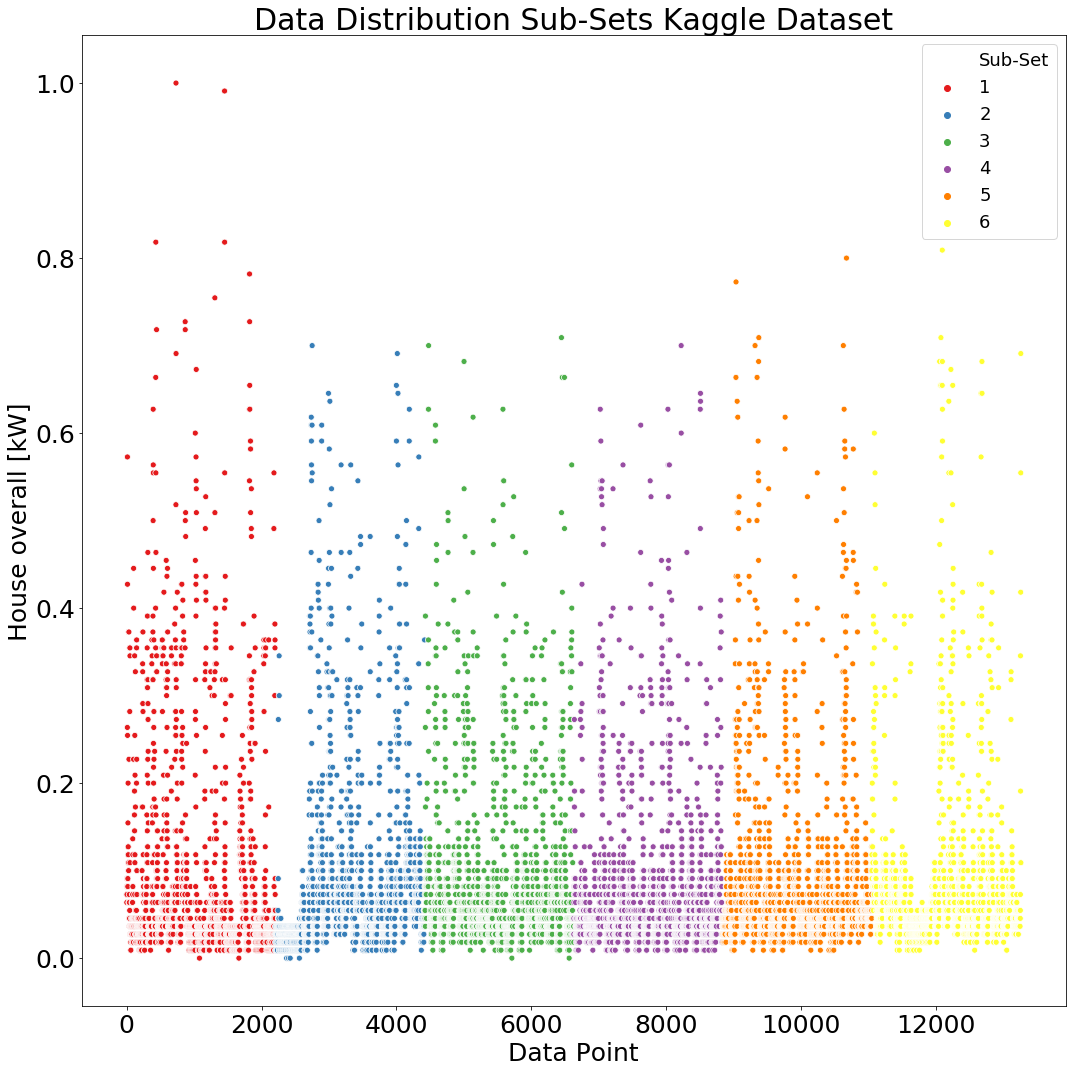

In [75]:
plt.figure(figsize=(15,15))

sns.scatterplot(x ='id',y = 'y',hue='Sub-Set',data = df_test, palette = sns.color_palette("Set1", n_colors=6))

plt.tick_params(labelsize=25)
plt.title("Data Distribution Sub-Sets Kaggle Dataset", fontsize=30, ha='center')

plt.xlabel('Data Point', fontsize=25, ha='center')
plt.ylabel('House overall [kW]', fontsize=25, ha='center')

plt.legend(fontsize = 18, title_fontsize = 20)

plt.tight_layout()
plt.savefig('C:/Users/Anton/Desktop/Exjobb MSC/graph_ex/Catplot_big.PNG')

In [34]:
df_test[cols_test[0:-1]]

,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,HouseConsum
0,0.242229,0.423256,0.903509,0.404762,0.764103,0.365008,0.045455
1,0.371383,0.817054,0.934211,0.214286,0.871795,0.563348,0.018182
2,0.257235,0.106977,0.921053,0.357143,0.938462,0.393665,0.127273
3,0.292605,0.406977,0.618421,0.571429,0.600000,0.266968,0.036364
4,0.450161,0.648837,0.960526,0.428571,0.953846,0.683258,0.081818
...,...,...,...,...,...,...,...
13249,0.494641,0.587209,0.901316,0.583333,0.458974,0.715686,0.072727
13250,0.238478,0.648062,0.782895,0.071429,0.392308,0.291101,0.100000
13251,0.538049,0.548062,0.500000,0.285714,0.600000,0.509804,0.045455
13252,0.316184,0.504651,0.421053,0.476190,0.600000,0.146305,0.081818


In [35]:
X_embedded = TSNE(n_components=2).fit_transform(df_test[cols_test[0:-1]])

In [36]:
X_embedded.shape

(13254, 2)

In [37]:
df_test['tsne-2d-one'] = X_embedded[:,0]
df_test['tsne-2d-two'] = X_embedded[:,1]



In [38]:
df_test['bin'] = pd.cut(df_test['HouseConsum'], 6) # HouseConsum # House overall [kW]

In [39]:
df_test.describe()

,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,HouseConsum,Sub-Set,tsne-2d-one,tsne-2d-two
count,13254.000000,13254.000000,13254.000000,13254.000000,13254.000000,13254.000000,13254.000000,13254.00000,13254.000000,13254.000000
mean,0.339028,0.605492,0.771579,0.314148,0.585555,0.416231,0.084332,3.50000,0.080777,0.047387
std,0.131201,0.188398,0.161414,0.189584,0.199349,0.165582,0.099010,1.70789,47.036377,45.143826
min,0.000000,0.000000,0.263158,0.000000,0.000000,0.000000,0.000000,1.00000,-98.672935,-92.497704
25%,0.247722,0.490698,0.664474,0.142857,0.425641,0.303167,0.036364,2.00000,-35.638855,-34.876323
50%,0.337621,0.619380,0.815789,0.285714,0.600000,0.419306,0.045455,3.50000,1.160503,-1.894378
75%,0.435691,0.753488,0.896930,0.428571,0.646154,0.529412,0.090909,5.00000,37.527767,33.716950
max,0.794212,1.000000,1.000000,1.000000,0.984615,0.814480,1.000000,6.00000,95.058533,96.673759


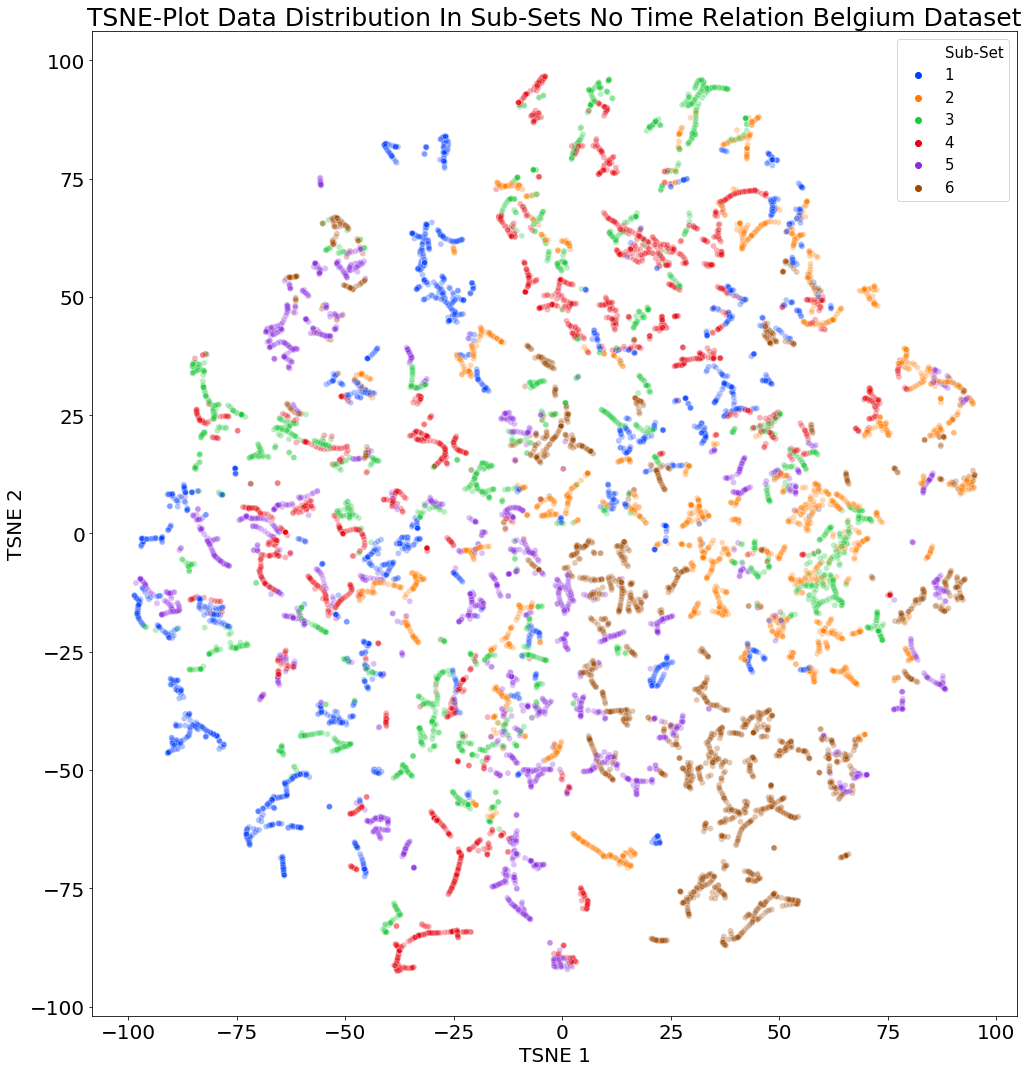

In [40]:

#
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Sub-Set",
    palette=sns.color_palette("bright", 6),
    #size = 'bin',
    data=df_test,
    legend="full",
    alpha=0.3
)

plt.tick_params(labelsize=20)
plt.title("TSNE-Plot Data Distribution In Sub-Sets No Time Relation Belgium Dataset", fontsize=25, ha='center')

plt.xlabel('TSNE 1', fontsize=20, ha='center')
plt.ylabel('TSNE 2', fontsize=20, ha='center')

plt.legend(fontsize = 15, title_fontsize = 15)
plt.tight_layout()

plt.savefig('C:/Users/Anton/Desktop/Exjobb MSC/graph_ex/TSNE_small.PNG')